# Distance function usage demonstration on a synthetic dataset
Goal of the excercise is to code Euclidean distance on your own and apply it to the NumPy matrix containing n-dimensional vectors (data points) in an Euclidean space as a rows.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

## Calculating distances between data points using Euclidean distance

- Load data points from 'data_points.csv' into the Pandas DataFrame and save the raw NumPy array to the *data* variable using *values* property
- Check calculated distances from table
- Hint: set index_col to proper value in case that the data are not loaded correctly

In [9]:
df = pd.read_csv('data_points.csv', index_col=0)
pointsGrid = pd.read_csv('data_points_grid.csv', sep=',')

tennis = pd.read_csv('tennis.csv', sep=',')

In [10]:
data = df.values

## Implement the *euclid_distance* function which takes two NumPy arrays as an input and return the distance between these two vectors
- Test the function on the first two rows of the matrix afterwards
    - Result = 6.429660566468498

In [7]:
def euclid_distance(x, y):
    result = math.sqrt(np.sum((x-y) ** 2))
    return result

In [38]:
print(euclid_distance(df.values[0], df.values[1]))

6.429660566468498


## Compute the distance matrix for the input data
- Elements of the matrix contain the distances between every two vectors of the input data
    - What is the shape of this matrix?
    - Does the matrix have some properties which you can guess prior to the constructing such matrix?
    - [np.zeros](https://numpy.org/doc/stable/reference/generated/numpy.zeros.html) might render useful

In [11]:
n_points = df.shape[0]
distance_matrix = np.zeros((n_points, n_points) )
for i in range(n_points):
    for j in range(n_points):
        distance_matrix[i, j] = euclid_distance(data[i], data[j])
distance_matrix


array([[ 0.        ,  6.42966057, 12.30120234, ...,  8.94152023,
         6.0988626 , 11.80736778],
       [ 6.42966057,  0.        ,  9.76693903, ...,  3.72946685,
         3.90255275,  9.08397529],
       [12.30120234,  9.76693903,  0.        , ...,  7.28611659,
         7.7543148 ,  5.75374061],
       ...,
       [ 8.94152023,  3.72946685,  7.28611659, ...,  0.        ,
         4.10697955,  6.39868612],
       [ 6.0988626 ,  3.90255275,  7.7543148 , ...,  4.10697955,
         0.        ,  6.50663899],
       [11.80736778,  9.08397529,  5.75374061, ...,  6.39868612,
         6.50663899,  0.        ]])

In [40]:
for i, j in [(0,1), (1,0), (1,1), (0,2), (0,3), (0,4), (0,5),(22,2),(42, 34), (97, 81)]:
    print(f'|{i}|{j}|{round(distance_matrix[i, j], 3)}|')

|0|1|6.43|
|1|0|6.43|
|1|1|0.0|
|0|2|12.301|
|0|3|12.365|
|0|4|10.825|
|0|5|12.771|
|22|2|9.682|
|42|34|8.195|
|97|81|4.927|


|Point1|Point2|Euclidean distance|
|:-------|:-------|:--------|
|0|1|6.43|
|1|0|6.43|
|1|1|0.0|
|0|2|12.301|
|0|3|12.365|
|0|4|10.825|
|0|5|12.771|
|22|2|9.682|
|42|34|8.195|
|97|81|4.927|


## Continue with only 2 dimensional data
- Restrict our data to only first two dimensions, i.e. columns
- Calculate distance matrix for these points
- Visualize the data points
- Select one point and its epsilon neigborhood based on the values in a distance matrix and distinguish the selected points with color (select point 83 and use eps value 1.5)

In [41]:
df_2d = df.iloc[:, :2].copy()
df_2d.columns = ['x', 'y']
df_2d.head()

,x,y
0,7.777,2.375
1,4.534,6.090
2,0.350,2.984
3,6.798,2.563
4,9.491,2.179


In [42]:
data = df_2d.values

In [ ]:
n_points = data.shape[0]
distance_matrix = np.zeros((n_points, 3))



# Your code

distance_matrix

<AxesSubplot:xlabel='x', ylabel='y'>

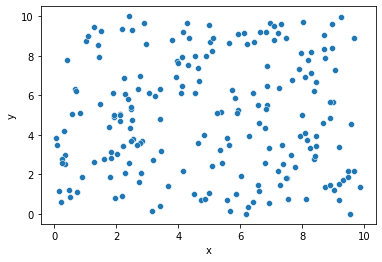

In [43]:
sns.scatterplot(data=df_2d, x='x', y='y')

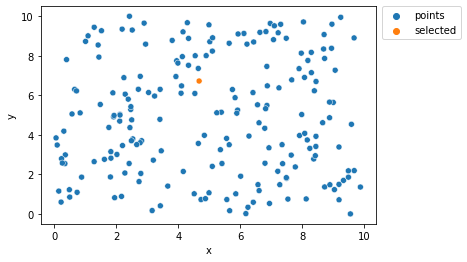

In [44]:
selected_point_id = 83
df_2d['mark'] = 'points'
df_2d.loc[selected_point_id, 'mark'] = 'selected'

sns.scatterplot(data=df_2d, x='x', y='y', hue='mark')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

In [45]:
eps = 1.5
np.where(distance_matrix[selected_point_id, :] < eps)[0]

array([83])

In [ ]:
fig = plt.figure(figsize=(6,6))

## Mark the selected points in the *mark* attribute

sns.scatterplot(data=df_2d, x='x', y='y', hue='mark')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

# One Rule Classifier implementation
- Load the *tennis.csv* into the Pandas CSV
- Implement the classification algorithm that generates one rule for each predictor in the data, then selects the rule with the smallest total error as its "one rule".
- Beware the fact that "ONE rule" it meant as a rule-set for ONE feature, i.e. there will be multiple rules created
- Find the rule-set with lowest error rate and print both error and rule-set
- You can take a look at [this website](https://www.saedsayad.com/oner.htm)

In [46]:
tennis = pd.read_csv('tennis.csv')
tennis

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


## Try to compute error for a given rules
- IF outlook == sunny THEN play = yes
- IF outlook == sunny THEN play = no
- Which one is better?

In [47]:
tennis.loc[tennis['outlook'] == 'sunny']

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
10,sunny,mild,normal,True,yes


In [48]:
tennis.loc[tennis['outlook'] == 'sunny'].shape

(5, 5)

In [49]:
tennis.loc[(tennis['outlook'] == 'sunny') & (tennis['play'] == 'yes')]

,outlook,temp,humidity,windy,play
8,sunny,cool,normal,False,yes
10,sunny,mild,normal,True,yes


In [50]:
tennis.loc[(tennis['outlook'] == 'sunny') & (tennis['play'] == 'yes')].shape

(2, 5)

## Error rate for the play = yes
- 3/5

In [51]:
tennis.loc[(tennis['outlook'] == 'sunny') & (tennis['play'] == 'yes')]

,outlook,temp,humidity,windy,play
8,sunny,cool,normal,False,yes
10,sunny,mild,normal,True,yes


In [52]:
(tennis.loc[tennis['outlook'] == 'sunny'].shape[0] - tennis.loc[(tennis['outlook'] == 'sunny') & (tennis['play'] == 'yes')].shape[0]) / tennis.loc[tennis['outlook'] == 'sunny'].shape[0]

0.6

## Error rate for the play = no
- 2/5

In [53]:
tennis.loc[(tennis['outlook'] == 'sunny') & (tennis['play'] == 'no')]

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
7,sunny,mild,high,False,no


In [54]:
(tennis.loc[tennis['outlook'] == 'sunny'].shape[0] - tennis.loc[(tennis['outlook'] == 'sunny') & (tennis['play'] == 'no')].shape[0]) / tennis.loc[tennis['outlook'] == 'sunny'].shape[0]

0.4

## How to compute the total error rate for an attribute?
- It's just a fraction with sum the partaial number of errors of the individual rules as a nominator and number of rows as a denominator :-)
- e.g. 5/14 for the Temperature-related rules

Hint: How to get just an unique values of a given feature? Just use *.unique()* method from Pandas


# Implement the 1R classifier in your code and print the best rule-set
- Example output:
~~~
IF outlook == sunny THEN play = no
IF outlook == overcast THEN play = yes
IF outlook == rainy THEN play = yes
~~~

In [67]:
# 1
rule_sets = {k: [] for k in tennis.columns[:-1]}
for col in tennis.columns[:-1]:
    for value in tennis[col].unique():
        yes_count = tennis.loc[(tennis[col] == value) & (tennis['play'] == "yes")].shape[0]
        no_count = tennis.loc[(tennis[col] == value) & (tennis['play'] == "no")].shape[0]
        if yes_count < no_count:
            tmp_cls = 'no'
            tmp_count = no_count
        else:
            tmp_cls = 'yes'
            tmp_count = yes_count
        rule_sets[col].append((col, value, tmp_cls, tmp_count))
    
rule_sets

{'outlook': [('outlook', 'sunny', 'no', 3),
  ('outlook', 'overcast', 'yes', 4),
  ('outlook', 'rainy', 'yes', 3)],
 'temp': [('temp', 'hot', 'yes', 2),
  ('temp', 'mild', 'yes', 4),
  ('temp', 'cool', 'yes', 3)],
 'humidity': [('humidity', 'high', 'no', 4), ('humidity', 'normal', 'yes', 6)],
 'windy': [('windy', False, 'yes', 6), ('windy', True, 'yes', 3)]}

In [70]:
size = tennis.shape[0]
best_rule_name = ''
best_success_rate = 0
for k,x in rule_sets.items():
    sum = 0
    for i in x:
        sum += i[3]
    success_rate = sum / size

    if(success_rate > best_success_rate):
        best_success_rate = success_rate
        best_rule_name = k

best_rule_name

'outlook'

In [71]:
for x in rule_sets[best_rule_name]:
    print(f"IF {x[0]} == {x[1]} THEN play = {x[2]}")

IF outlook == sunny THEN play = no
IF outlook == overcast THEN play = yes
IF outlook == rainy THEN play = yes


# Tasks
## Task 1 (1p)
1. Load the data points from *'data_points_grid.csv'*
2. Create function for Manhattan distance calculation - you can see [this](https://en.wikipedia.org/wiki/Taxicab_geometry)
3. Use Manhattan distance for the distance matrix calculation
- Select point on index **421**, calculate its neighborhood points with eps <= 1.5
- Visualize the result
4. Use Euclidean distance for the distance matrix calculation
- Select point on index **421**, calculate its neighborhood points with eps <= 1.5
- Visualize the result

**Describe the differences you see for both of the images in a Markdown cell!**

#### Optional
- Repeat the process for 2-Dimensional random data used during excersice. 
- Use Manhattan distance instead of Euclidean. Do you see any difference?

## Task 2 (1p)
- Finish the Single-rule (1R) classifier implementation



In [1]:
def manhattan_distance(x, y):
    assert x.size == y.size
    return (abs(x[0] - y[0]) + abs(x[1] - y[1]))

In [15]:
df_2d_grid = pd.read_csv('data_points_grid.csv', index_col=0)
data = df_2d_grid.values
df_2d_grid.head()

,x,y
0,0.000000,0.0
1,0.256410,0.0
2,0.512821,0.0
3,0.769231,0.0
4,1.025641,0.0


<AxesSubplot:xlabel='x', ylabel='y'>

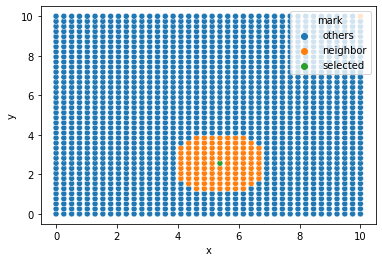

In [35]:
df_2d_grid["mark"] = "others"
df_2d_grid.loc[421, "mark"] = "selected"
n_points = data.shape[0]

distance_matrix = np.zeros((n_points, n_points))
for i in range(n_points - 1):
    for j in range(n_points - 1):
        distance_matrix[i, j] = euclid_distance(data[i], data[j])
for i in np.where(distance_matrix[421,:] <= 1.5)[0]:
    df_2d_grid.loc[i, "mark"] = "neighbor"
df_2d_grid.loc[421, "mark"] = "selected"
sns.scatterplot(data=df_2d_grid, x=df_2d_grid.x, y=df_2d_grid.y, hue="mark")


In [36]:


df_2d_grid["mark"] = "others"
df_2d_grid.loc[421, "mark"] = "selected"

n_points = data.shape[0]

distance_matrix = np.zeros((n_points, n_points) )
for i in range(n_points):
    for j in range(n_points):
        distance_matrix[i, j] = manhattan_distance(data[i], data[j])
distance_matrix

array([[ 0.        ,  0.25641026,  0.51282051, ..., 19.48717949,
        19.74358974, 20.        ],
       [ 0.25641026,  0.        ,  0.25641026, ..., 19.23076923,
        19.48717949, 19.74358974],
       [ 0.51282051,  0.25641026,  0.        , ..., 18.97435897,
        19.23076923, 19.48717949],
       ...,
       [19.48717949, 19.23076923, 18.97435897, ...,  0.        ,
         0.25641026,  0.51282051],
       [19.74358974, 19.48717949, 19.23076923, ...,  0.25641026,
         0.        ,  0.25641026],
       [20.        , 19.74358974, 19.48717949, ...,  0.51282051,
         0.25641026,  0.        ]])

In [37]:
for i in np.where(distance_matrix[421,:] <= 1.5)[0]:
    df_2d_grid.loc[i, "mark"] = "neighbor"
df_2d_grid.loc[421, "mark"] = "selected"
#df_2d_grid[(df_2d_grid.mark == "neighbor"),:].count()
df_2d_grid.groupby("mark").mark.count().reset_index(name="Count")

,mark,Count
0,neighbor,60
1,others,1539
2,selected,1


<AxesSubplot:xlabel='x', ylabel='y'>

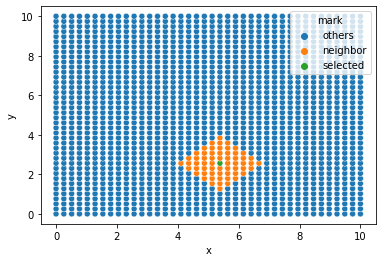

In [38]:
sns.scatterplot(data=df_2d_grid, x=df_2d_grid.x, y=df_2d_grid.y, hue="mark")

Euklidova vzdálenost je přesnější a získáme tím více bodů.